This week picking up with last week's code but plan to change the method being used for solving Schrӧdinger wave equation.

C:\Users\Brian\anaconda3\lib\site-packages\numpy\lib\function_base.py:1069: RuntimeWarning: overflow encountered in true_divide
  out[tuple(slice1)] = (f[tuple(slice4)] - f[tuple(slice2)]) / (2. * ax_dx)
C:\Users\Brian\anaconda3\lib\site-packages\numpy\lib\function_base.py:1069: RuntimeWarning: overflow encountered in subtract
  out[tuple(slice1)] = (f[tuple(slice4)] - f[tuple(slice2)]) / (2. * ax_dx)
C:\Users\Brian\AppData\Local\Temp/ipykernel_16940/379888703.py:33: RuntimeWarning: overflow encountered in multiply
  new_phi = (-h_bar**2 / (2 * m) * second_derivative + V * phi) / E
C:\Users\Brian\AppData\Local\Temp/ipykernel_16940/379888703.py:33: RuntimeWarning: invalid value encountered in multiply
  new_phi = (-h_bar**2 / (2 * m) * second_derivative + V * phi) / E
C:\Users\Brian\AppData\Local\Temp/ipykernel_16940/379888703.py:35: RuntimeWarning: invalid value encountered in subtract
  error = np.linalg.norm(new_phi - phi)
C:\Users\Brian\AppData\Local\Temp/ipykernel_16940/379888703.p

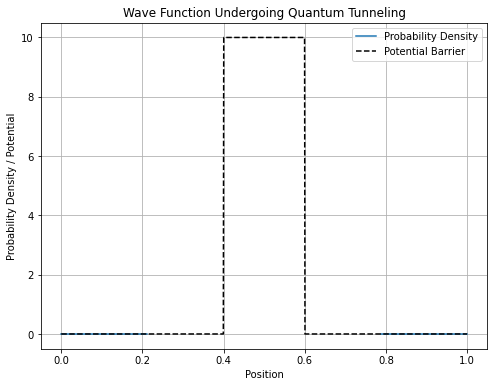

In [1]:
#last week's code


import numpy as np
import matplotlib.pyplot as plt


h_bar = 1   # Planck's constant / 2π
m = 1.0      # Particle mass
dx = 0.02    # Step size in space
N = 1000     # Number of spatial points

#defining a function for the potential barrier for the particle to pass through
def potential_barrier(x, barrier_width, barrier_height):
    return barrier_height if 0.4 < x < 0.6 else 0

# Initial values
x_values = np.linspace(0, 1, N)
phi = np.ones(N)  # Initial guess for wave function
E = 0.6  # Energy of the particle

tolerance = 1e-6

# Iterative method
error = 1
while error > tolerance:
    # Calculating the potential energy at each point
    V = np.array([potential_barrier(x, 0.2, 10) for x in x_values])

    second_derivative = np.gradient(np.gradient(phi, dx), dx)
    
    # Updating the wave function using the time independent Schrödinger equation
    new_phi = (-h_bar**2 / (2 * m) * second_derivative + V * phi) / E
    
    error = np.linalg.norm(new_phi - phi)
    phi = new_phi


plt.figure(figsize=(8, 6))
plt.plot(x_values, np.abs(phi)**2, label = 'Probability Density')
plt.plot(x_values, V, 'k--', label='Potential Barrier')
plt.title('Wave Function Undergoing Quantum Tunneling')
plt.xlabel('Position')
plt.ylabel('Probability Density / Potential')
plt.legend()
plt.grid(True)
plt.show()


Finite differece method

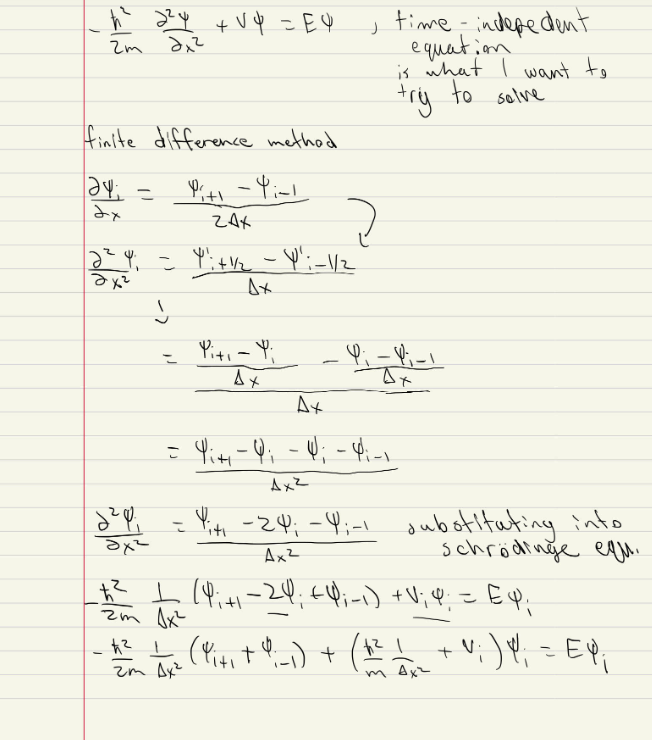

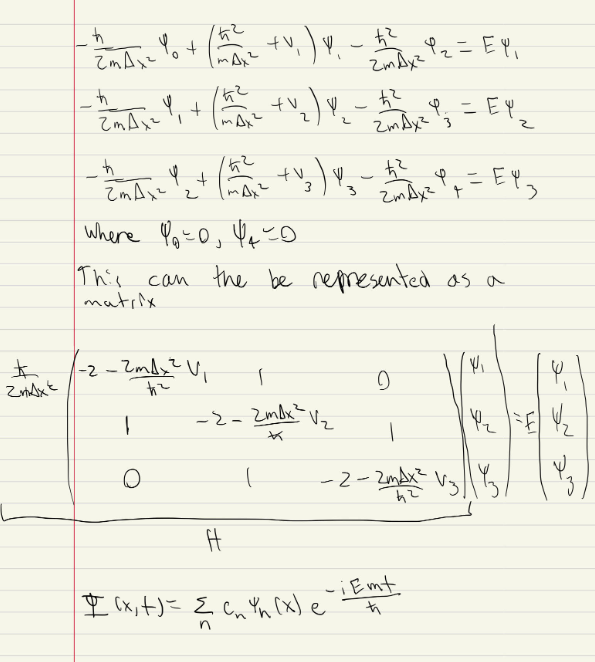

In [3]:
import numpy as no
import matplotlib.pyplot as plt



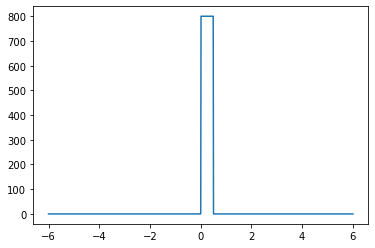

In [6]:
#defining constants

m = 1
h_bar = 1

#defing the barrier

xmin = -6
xmax = 6

N = 1000

x = np.linspace(xmin, xmax,N+1 )

dx = x[1]-x[0]

p = 40
V_0 = p**2 / (2*m)
sigma = 0.15
x0 = 2
V = 0*x

#potential barrier

for i in range(len(V)):
    if x[i]>0 and x[i]<0.5:
        V[i]=V_0
plt.plot(x,V)

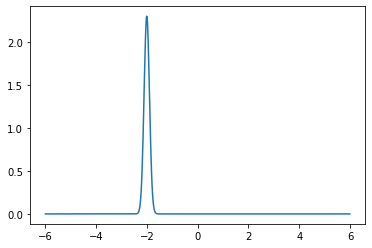

In [7]:
#wave
Psi0 = np.exp(-(x[1:-1]+x0)**2/sigma**2) * np.exp(1j*p*(x[1:-1]+x0)) 

#normalizing the function
A = np.sum(np.abs(Psi0)**2 * dx)

Psi0 = Psi0/np.sqrt(A)

plt.plot(x[1:-1], np.abs(Psi0))

In [9]:
#code for understanding how to create matrices in python

Nn = 6

W = -2*np.diag(np.ones(Nn)) +3*np.diag(np.ones(Nn-1),1)

print(W)

[[-2.  3.  0.  0.  0.  0.]
 [ 0. -2.  3.  0.  0.  0.]
 [ 0.  0. -2.  3.  0.  0.]
 [ 0.  0.  0. -2.  3.  0.]
 [ 0.  0.  0.  0. -2.  3.]
 [ 0.  0.  0.  0.  0. -2.]]


(999, 999)


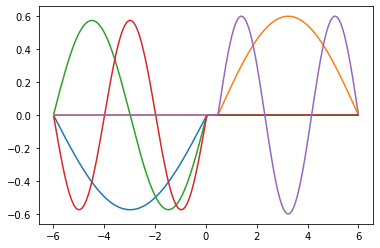

In [13]:
H = (h_bar**2/(m*dx**2))*np.diag(np.ones(N-1))+V[1:-1]*np.diag(np.ones(N-1))+ (-h_bar**2/(2*m*dx**2))*np.diag(np.ones(N-2),1)+ (-h_bar**2/(2*m*dx**2))*np.diag(np.ones(N-2),-1)

print(H.shape)

E, psi = np.linalg.eigh(H)

psi = psi.T
A = np.sum(np.abs(psi[0])**2 *dx)
psi = psi/np.sqrt(A)

plt.plot(x[1:-1], psi[0])
plt.plot(x[1:-1], psi[1])
plt.plot(x[1:-1], psi[2])
plt.plot(x[1:-1], psi[4])
plt.plot(x[1:-1], psi[5])

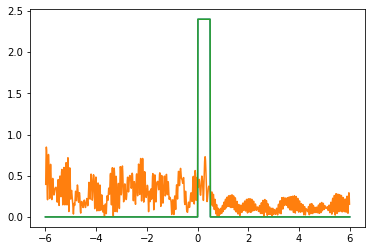

In [45]:
plt.plot(x, 0.003*V)

c = 0*Psi0
for i in range(len(c)):
    c[i] = np.sum(np.conj(psi[i]*Psi0*dx))
    
# print(c[0], c[1], c[2], c[3])

t = 0
dt = 0.001


t= t+10000*dt

Psi = 0*psi[0]
for i in range(len(c)):
    Psi = Psi +c[i]*psi[i]*np.exp(1j*E[i]*t/h_bar)
    
plt.plot(x[1:-1], np.abs(Psi))
plt.plot(x, 0.003*V)

(999, 999)


C:\Users\Brian\anaconda3\lib\site-packages\matplotlib\animation.py:973: UserWarning: Animation was deleted without rendering anything. This is most likely unintended. To prevent deletion, assign the Animation to a variable that exists for as long as you need the Animation.
  warnings.warn(


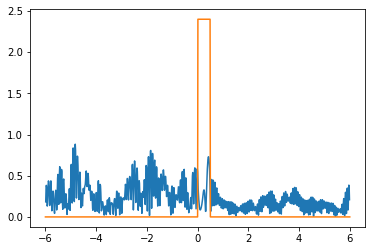

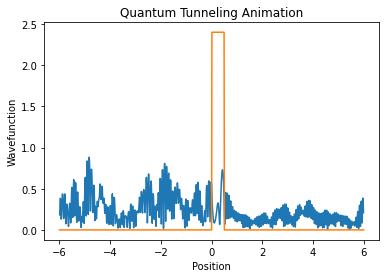

In [30]:
#first attempt at trying to animate the wave


from matplotlib.animation import FuncAnimation

m = 1
h_bar = 1

#defing the barrier

xmin = -6
xmax = 6

N = 1000

x = np.linspace(xmin, xmax,N+1 )

dx = x[1]-x[0]

p = 40
V_0 = p**2 / (2*m)
sigma = 0.15
x0 = 2
V = 0*x

#potential barrier

for i in range(len(V)):
    if x[i]>0 and x[i]<0.5:
        V[i]=V_0
        
H = (h_bar**2/(m*dx**2))*np.diag(np.ones(N-1))+V[1:-1]*np.diag(np.ones(N-1))+ (-h_bar**2/(2*m*dx**2))*np.diag(np.ones(N-2),1)+ (-h_bar**2/(2*m*dx**2))*np.diag(np.ones(N-2),-1)

print(H.shape)

E, psi = np.linalg.eigh(H)

psi = psi.T
A = np.sum(np.abs(psi[0])**2 *dx)
psi = psi/np.sqrt(A)        

c = 0*Psi0
for i in range(len(c)):
    c[i] = np.sum(np.conj(psi[i]*Psi0*dx))
    
# print(c[0], c[1], c[2], c[3])

t = 0
dt = 0.001


t= t+10000*dt

Psi = 0*psi[0]
for i in range(len(c)):
    Psi = Psi +c[i]*psi[i]*np.exp(-1j*E[i]*t/h_bar)
    
plt.plot(x[1:-1], np.abs(Psi))
plt.plot(x, 0.003*V)

fig, ax = plt.subplots()

line, = ax.plot(x[1:-1], np.abs(Psi))
potential_line, = ax.plot(x, 0.003 * V)

def update(frame):
    t = frame * dt

    Psi = 0 * psi[0]
    for i in range(len(c)):
        Psi = Psi + c[i] * psi[i] * np.exp(-1j * E[i] * t / h_bar)

    line.set_ydata(np.abs(Psi))
    return line,

ani = FuncAnimation(fig, update, frames=200, interval=10)
plt.xlabel('Position')
plt.ylabel('Wavefunction')
plt.title('Quantum Tunneling Animation')
plt.show()


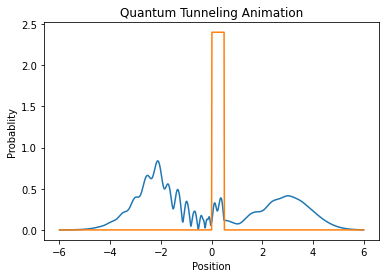

In [44]:
#second attempt at trying to animate code since previous attempt did not workout how I expected

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML, display


fig, ax = plt.subplots()

line, = ax.plot(x[1:-1], np.abs(Psi))
potential_line, = ax.plot(x, 0.003 * V)


#setting x and y-axis limits so that the wave does not interfere with the outline of the plot
# plt.xlim(xmin, xmax)
# plt.ylim(0, max(np.abs(Psi)) + 0.1)  

def update(frame):
    t = frame * dt

    Psi = 0 * psi[0]
    for i in range(len(c)):
        Psi = Psi + c[i] * psi[i] * np.exp(1j * E[i] * t / h_bar)

    line.set_ydata(np.abs(Psi))
    return line,


ani = FuncAnimation(fig, update, frames=125, interval=100)

plt.xlabel('Position')
plt.ylabel('Probablity')
plt.title('Quantum Tunneling Animation')


HTML(ani.to_jshtml())
